# Dimensionality Reduction

## Principal Component Analysis

This IPython notebook will be my work area for practicing and demonstrating principles of unsupervised machine learning 
specifically the Principal Component Analysis.

Principle Component Analysis (PCA) is a dimension reduction technique that can find the combinations of variables that explain the most variance.

**Example 1**: Starting by examining a simple dataset, the Iris data available by default in scikit-learn. The data consists of measurements of three different species of irises. There are three species of iris in the dataset:
        1. Iris Virginica
        2. Iris Setosa
        3. Iris Versicolor

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
#checking to see what datasets are available in iris
print (iris.keys())

dict_keys(['target_names', 'DESCR', 'target', 'data', 'feature_names'])


In [2]:
#checking shape of data and list of features (X matrix)
print (iris.data.shape)
print (iris.feature_names)

#checking target values
print (iris.target_names)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
#importing and instantiating PCA with 2 components.
from sklearn.decomposition import PCA
pca = PCA(2)
print (pca)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [4]:
#Fitting PCA to the iris dataset and transforming it into 2 principal components
X, y = iris.data, iris.target
X_proj = pca.fit_transform(X)
print (X_proj.shape)

(150, 2)


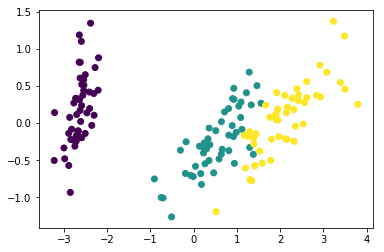

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#Plotting the projected principal components and try to understand the data.
#Ignoring what's in y, it looks more like 2 clusters of data points rather than 3
#c=y colors the scatter plot based on y (target)
plt.scatter(X_proj[:,0], X_proj[:,1],c=y)
plt.show()


In [6]:
#pca.components_ has the meaning of each principal component, essentially how it was derived
#checking shape tells us it has 2 rows, one for each principal component and 4 columns, proportion of each of the 4 features
#for each row
print (pca.components_)
print (pca.components_.shape)

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
(2, 4)


In [7]:
#Trying to decipher the meaning of the principal components
print ("Meaning of the 2 components:")
for component in pca.components_:
    print (" + ".join("%.2f x %s" % (value, name)
                     for value, name in zip(component, iris.feature_names)))

Meaning of the 2 components:
0.36 x sepal length (cm) + -0.08 x sepal width (cm) + 0.86 x petal length (cm) + 0.36 x petal width (cm)
0.66 x sepal length (cm) + 0.73 x sepal width (cm) + -0.18 x petal length (cm) + -0.07 x petal width (cm)


In [8]:
#this tells us the extent to which each component explains the original dataset.
#so the 1st component is able to explain ~92% of X and the second only about 5.3%
#Together they can explain about 97.3% of the variance of X 
print (pca.explained_variance_ratio_)

[ 0.92461621  0.05301557]


In [9]:
#So if we only needed a 92% variance, we actually need just one component, let's verify
pca=PCA(0.92)
X_new=pca.fit_transform(X)
print (X_new.shape)

#If we need more than 97% variance, we begin to need more components
pca=PCA(0.98)
X_new=pca.fit_transform(X)
print (X_new.shape)


(150, 1)
(150, 3)



**Example 2** Moving to a larger dataset, the digits dataset, again available in scikit-learn

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
print (digits.keys())

dict_keys(['target_names', 'DESCR', 'target', 'data', 'images'])


In [11]:
#looking at data, there looks to be 64 features, what are these?
print (digits.data.shape)
#another available dataset is called images. Let's check this out.
print (digits.images.shape)

#So, the features are nothing but a reshape of the images data 8X8 pixels thrown next to each other describing the  
#intensity of each pixel. The imput is a set of images of digits from which we need to learn the target, 
#which is the actual digit itself.

(1797, 64)
(1797, 8, 8)


In [23]:
#Running PCA retaining 95% of the variance 
X,y = digits.data, digits.target
pca_digits=PCA(0.9999)
X_proj = pca_digits.fit_transform(X)
print (X.shape, X_proj.shape)

#So with 64 original features, we need 29 principal components to explain 95% of the original dataset


(1797, 64) (1797, 54)


In [17]:
#Let's run PCA with 2 components so as to plot the data in 2D
pca_digits=PCA(2)
X_proj = pca_digits.fit_transform(X)
print (np.sum(pca_digits.explained_variance_ratio_))

#Note we only retain about 28% of the variance by choosing 2 components

0.285093648236


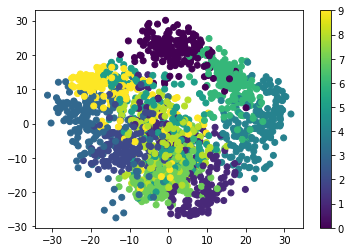

In [18]:
#Let's plot the principal components as a scatter plot
plt.scatter(X_proj[:,0], X_proj[:,1], c=y)
plt.colorbar()
plt.show()

#This basically plots the 2 principal components and colors the values based on target (9 digits). 
#It beautifully explains some similarities in the data (though not enough). 
#Note that 0 is pretty much by itself while 1 is pretty close to 7.

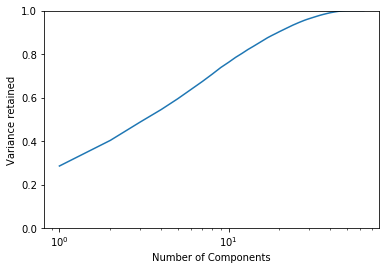

In [19]:
#How much data are we throwing away? 
#Lets try and plot number of components versus explained variance ratio as a cumulative sum to find out
pca_digits = PCA(64).fit(X)
plt.semilogx(np.cumsum(pca_digits.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance retained')
plt.ylim(0,1)
plt.show()

**Example 3**: OK now onto a bigger challenge, let's try and compress a facial image dataset using PCA. Going to use the Olivetti face image dataset, again available in scikit-learn. Would like to reduce the original dataset using PCA, essentially compressing the images and see how the compressed images turn out by visualizing them.

In [24]:
#Before using PCA, let us try and understand as well as display the original images
#Note the Olivetti faces data is available in scikit-learn but not locally. It needs to be downloaded.
from sklearn.datasets import fetch_olivetti_faces
oliv=fetch_olivetti_faces()
print (oliv.keys())

print (oliv.data.shape) #tells us there are 400 images that are 64 x 64 (4096) pixels each

dict_keys(['data', 'DESCR', 'target', 'images'])
(400, 4096)


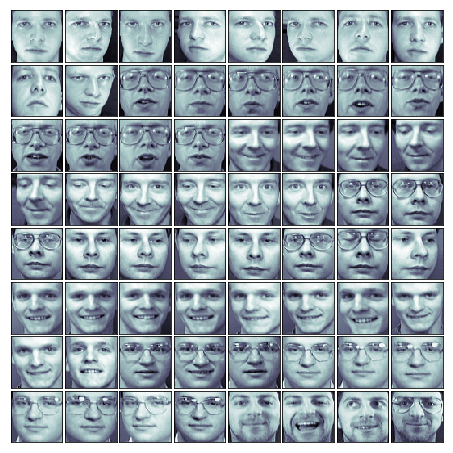

In [25]:
#Setup a figure 6 inches by 6 inches
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(oliv.images[i], cmap=plt.cm.bone, interpolation='nearest')

plt.show()

In [26]:
#Let's see how much of the variance is retained if we compressed these down to a 8x8 (64) pixel images.
X,y=oliv.data, oliv.target
pca_oliv = PCA(64)
X_proj = pca_oliv.fit_transform(X)
print (X_proj.shape)

(400, 64)


In [29]:
print (np.cumsum(pca_oliv.explained_variance_ratio_))


#That's terrific, compressing a 64x64 pixel image down to an 8x8 image still retains about 89.7% of the variance

[ 0.23812729  0.378067    0.45775314  0.50773645  0.54383493  0.57540433
  0.59967265  0.62003663  0.63961777  0.65633899  0.6722912   0.68666099
  0.6991284   0.71059973  0.72122851  0.73100571  0.74019631  0.74835205
  0.75589079  0.76336064  0.77034642  0.7764927   0.78233197  0.78802919
  0.79349109  0.79880963  0.80394778  0.80890618  0.81348274  0.81789454
  0.82191452  0.82575635  0.82937571  0.83272099  0.83592442  0.83908458
  0.84213551  0.8451215   0.84794201  0.85068054  0.85327745  0.8558162
  0.85825859  0.86065537  0.86295615  0.8652145   0.86743409  0.86963464
  0.87172081  0.87376786  0.87572455  0.87763499  0.87947547  0.88124509
  0.88300649  0.88472136  0.88637221  0.88798636  0.88958972  0.89112219
  0.89264438  0.89410941  0.89555851  0.89698685]


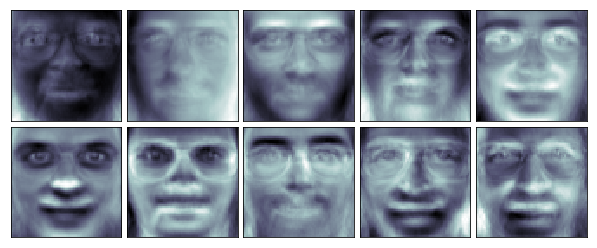

In [30]:
#This is great so far. Now we have a reduced 64 dimension dataset, generated with 64 principal components.
#Each of these principal components can explain some variation in the original dataset. The parameter components_ of the 
#estimator object gives the components with maximum variance

# Below we'll try to visualize the top 8 principal components. This is NOT a reconstruction of the original data, just 
# visualizing the principal components as images. The principal components are vectors of the length = to the number of 
# features 4096. We'll need to reshape it to a 64 x 64 matrix.

#Setup a figure 8 inches by 8 inches
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 pixels
for i in range(10):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(pca_oliv.components_[i,:], (64,64)), cmap=plt.cm.bone, interpolation='nearest')

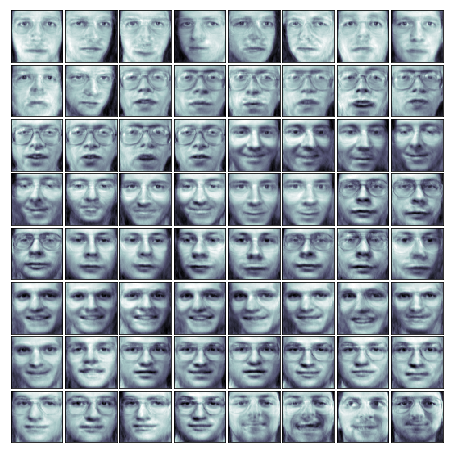

In [31]:
#Awesome, let's now try to reconstruct the images using the new reduced dataset. In other words, we transformed the 
#64x64 pixel images into 8x8 images. Now to visualize how these images look we need to inverse transform the 8x8 images
#back to 64x64 dimension. Note that we're not reverting back to the original data, we're simply going back to the 
#actual dimension of the original images so we can visualize them.

X_inv_proj = pca_oliv.inverse_transform(X_proj)
#reshaping as 400 images of 64x64 dimension
X_proj_img = np.reshape(X_inv_proj,(400,64,64))

#Setup a figure 8 inches by 8 inches
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 dimension but 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')
    
# This is not bad at all, the image still looks pretty good but the finer details are missing, which is okay considering 
# we've reduced dimensionality by 64 times.

**Example 4**: Would like to experiment with RandomizedPCA, a variant of PCA that supposedly is good to break down/compress
original data/images since it works based on the following logic:

    Linear dimensionality reduction uses approximated Singular Value Decomposition of the data and 
    keeps only the most significant singular vectors to project the data to a lower dimensional space

In [32]:
from sklearn.decomposition import RandomizedPCA
rpca_oliv = RandomizedPCA(64).fit(X)

print ("Randomized PCA with 64 components: ", np.sum(rpca_oliv.explained_variance_ratio_))
print ("PCA with 64 components: ", np.sum(pca_oliv.explained_variance_ratio_))

#The cumulative explained variance doesn't tell us much. It actually is slightly less than PCA.

/Users/karanrajwanshi/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


Randomized PCA with 64 components:  0.895314521087
PCA with 64 components:  0.896986847651


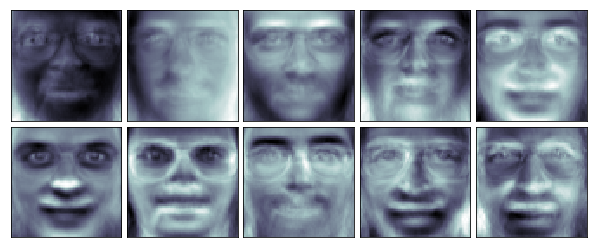

In [33]:
# Let's try and plot the principal components to see if the images look any better. 

# Setup a figure 8 inches by 8 inches
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 pixels
for i in range(10):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(rpca_oliv.components_[i,:], (64,64)), cmap=plt.cm.bone, interpolation='nearest')
    
# Interesting! Some of the images actually look a bit better than those rendered with PCA.

**Example 5**: Going to read a raw image as a numpy array, reduce it using PCA and render it back to its original dimension. Let's see how much of a difference there is in file size, quality etc.

(1143, 1143, 3)


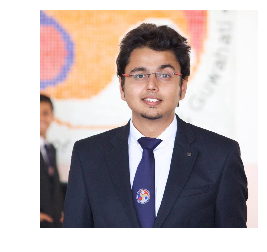

In [34]:
#Okay, let's import this image called "wild.png", stored in the same working directory as this notebook.

import matplotlib.image as mpimg
img = mpimg.imread('me.png')

#Now, let's look at the size of this numpy array object img as well as plot it using imshow.

print (img.shape)
plt.axis('off')
plt.imshow(img)


In [36]:
#Okay, so the array has 1143 rows each of pixel 996x3. Let's reshape it into a format that PCA can understand.
# 3429 = 1143 * 3
img_r = np.reshape(img, (1143, 3429))
print (img_r.shape)

(1143, 3429)


In [37]:
# Great, now lets run RandomizedPCA with 256 components (16x16 pixels) and transform the image.

ipca = RandomizedPCA(100).fit(img_r)
img_c = ipca.transform(img_r)
print (img_c.shape)
print (np.sum(ipca.explained_variance_ratio_))

#Great, looks like with 64 components we can explain about 96% of the variance.

/Users/karanrajwanshi/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


(1143, 100)
0.998197516906


In [38]:
#OK, now to visualize how PCA has performed this compression, let's inverse transform the PCA output and 
#reshape for visualization using imshow.
temp = ipca.inverse_transform(img_c)
print (temp.shape)

#reshaping 2988 back to the original 1143 * 3
temp = np.reshape(temp, (1143,1143,3))

print(temp.shape)

(1143, 3429)
(1143, 1143, 3)


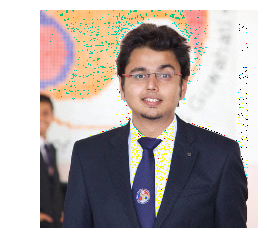

In [39]:
#Great, now lets visualize like before with imshow
plt.axis('off')
plt.imshow(temp)